In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from scipy.stats.stats import pearsonr

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import Experiment_Ready as exp


C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:

import os
import sys
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

In [6]:
from sklearn import metrics
import statsmodels
from math import sqrt
from math import log
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'01-30 14:24'

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [8]:
#Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
Scaler_Type_Options = [ 'MinMaxScaler' ]
Scalertype=Scaler_Type_Options[0]
Product_Type_Options = [841810,841840,841850]

In [9]:
Scalertype

'MinMaxScaler'

In [10]:
Product=Product_Type_Options[0] #841810
Exp_Country='CHN' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [11]:
Product

841810

In [12]:


MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]
    
    

In [13]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)


In [14]:
Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

(2647, 3593, 0.36)

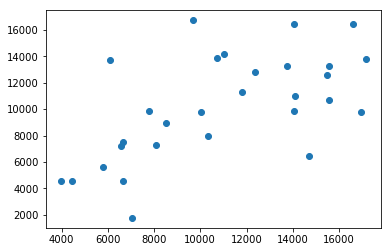

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Decison tree regressor model
dt = DecisionTreeRegressor()

# Decison tree regressor model train
DecisionTreeRegressor.fit(dt,X_train,y_train)

# Decison tree regressor model predict
y_predict_test = dt.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')


(1929, 2557, 0.646)

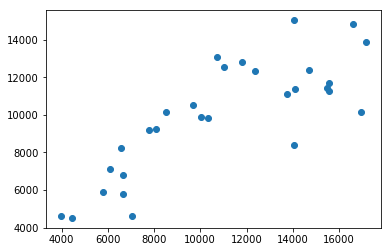

In [16]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [17]:
rfc.feature_importances_

array([0.01943472, 0.06026852, 0.03433019, 0.01923247, 0.0177854 ,
       0.02043085, 0.01593426, 0.02791242, 0.01039028, 0.03019204,
       0.01265629, 0.02045132, 0.00805582, 0.03503778, 0.0084928 ,
       0.03735996, 0.01612452, 0.05370203, 0.01865435, 0.06117783,
       0.0133751 , 0.27897317, 0.07926847, 0.00706251, 0.0265486 ,
       0.06714829])

In [18]:
rfc.score(X,y)

-3.8835770434595287

MAE 0 MSE 0 R2 -0.408
Feature ranking:
1. feature CPI_CHN-3 21 (0.367046) 0.219117
2. feature CPI_GBR-3 22 (0.103280) 0.193044
3. feature CLI_GBR-3 19 (0.065898) 0.070235
4. feature CHN_World_841810-3 1 (0.044571) 0.075229
5. feature BCI_GBR-3 17 (0.042049) 0.043403
6. feature CLI_CHN-3 15 (0.040883) 0.045357
7. feature ITA_GBR_841810-3 9 (0.028529) 0.033943
8. feature CHN_AUS_841810-3 5 (0.025249) 0.030335
9. feature BCI_CHN-3 13 (0.024590) 0.027722
10. feature CCI_GBR-3 18 (0.024351) 0.027731
11. feature POL_GBR_841810-3 7 (0.024334) 0.026717
12. feature GDP_CHN-3 16 (0.023531) 0.030324
13. feature CHN_USA_841810-3 2 (0.020608) 0.051253
14. feature World-3 25 (0.019482) 0.077270
15. feature GDP_GBR-3 20 (0.018374) 0.026950
16. feature CHN_JPN_841810-3 3 (0.014626) 0.021302
17. feature CHN_FRA_841810-3 4 (0.014500) 0.023591
18. feature GBP-3 24 (0.013338) 0.021371
19. feature EPU_CHN-3 10 (0.013167) 0.021586
20. feature EPU_GBR-3 11 (0.012578) 0.026070
21. feature TUR_GBR_841810-3 6 (

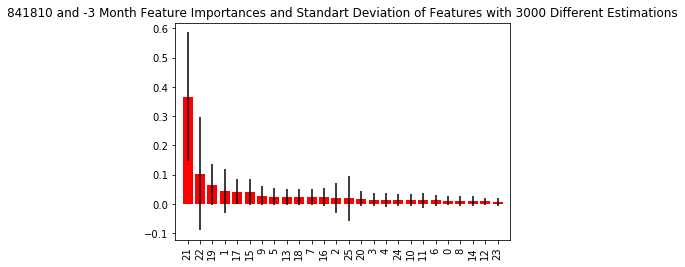

In [16]:
# 1 Version for Feature selection
# Internetten bulunan kod blogu
# Random Forest'a gore Feature Importance Hesaplama
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

ScalerType = Scalertype=Scaler_Type_Options[0]
n_sample=len(X)

rfc=RandomForestRegressor(n_estimators=3000)
RandomForestRegressor.fit(rfc,scaled_value_X,scaled_value_y)


predictions = rfc.predict(X_test)
print('MAE',int(metrics.mean_absolute_error(y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(y_test, predictions)))/1000
     )


importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[indices[f]], indices[f], importances[indices[f]],std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations".format(Product,MonthSeries))
plt.bar(range(n_feature), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n_feature), indices,rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations.png".format(Product,MonthSeries), format='png', dpi=300)

plt.show()

Features scores:
0 CHN_GBR_841810-3
1 CHN_World_841810-3
2 CHN_USA_841810-3
3 CHN_JPN_841810-3
4 CHN_FRA_841810-3
5 CHN_AUS_841810-3
6 TUR_GBR_841810-3
7 POL_GBR_841810-3
8 KOR_GBR_841810-3
9 ITA_GBR_841810-3
10 EPU_CHN-3
11 EPU_GBR-3
12 EPU_World-3
13 BCI_CHN-3
14 CCI_CHN-3
15 CLI_CHN-3
16 GDP_CHN-3
17 BCI_GBR-3
18 CCI_GBR-3
19 CLI_GBR-3
20 GDP_GBR-3
21 CPI_CHN-3
22 CPI_GBR-3
23 CNY-3
24 GBP-3
25 World-3


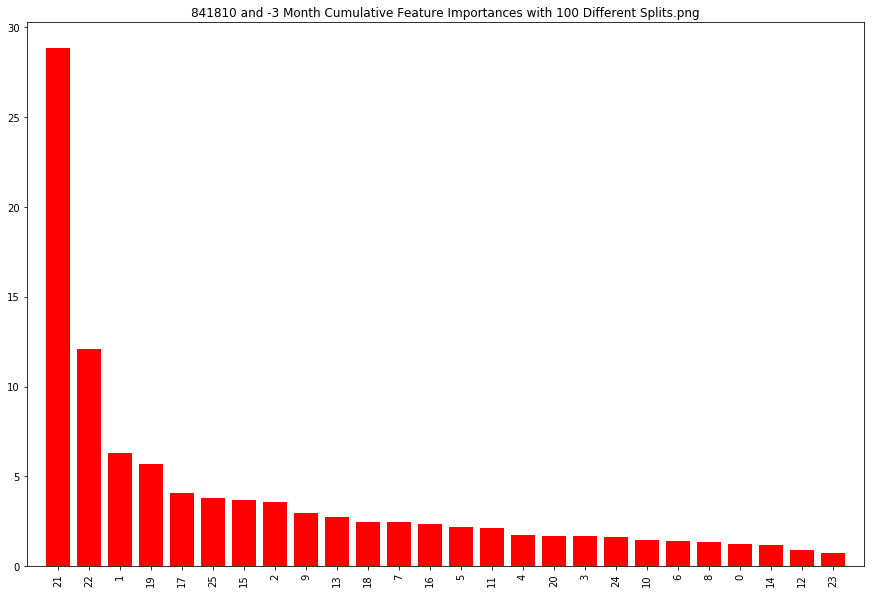

In [17]:
#  2 Version for Feature selection 
# Internetten bulunan kod blogu http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature Importance Hesaplama
# Burada asıl özellik bir veri seti yaratılıyor make_regression ile. Ve oaradakilere dogru çalışıp çalışmadığı test ediliyor.
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

from sklearn.datasets import make_regression


n_sample=len(X)

number_of_split=100
number_of_row=29

random_state_options = np.arange(0,number_of_split)
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))
j=0


# For different split sets Random Forest Regressor runs.

for random_state_i in random_state_options:

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    

    rfc=RandomForestRegressor(n_estimators=30)
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict[:,j] = rfc.predict(X_test)
    
    result=exp.inverse_scale_and_graph_Y_predict_and_test (y_predict[:,j],y_test,scaler_y,'NO')
    
    importances = rfc.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

    indices = np.argsort(importances)[::-1]
    feature_indices[:,j]=indices
    feature_importances[:,j]=importances
    j=j+1
    

print ("Features scores:")    
for i in range(n_feature):
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]
        importances_coeff=feature_importances[i,j]
        
        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)
        
#        print('feat=',i,'#ofsplit=',j,'tot_indice',feature_indices_score[i],
#              'indice=',indice_coeff,'tot_importan=',feature_importances_score[i],'importan',importances_coeff )

    print( i,X_Column_Names[i])#,feature_indices_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_indices_score)
scored_feature_importances = np.argsort(feature_importances_score)
    
 
    
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_importances_score[scored_feature_importances][::-1],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_importances[::-1],rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()

C:\Users\murat.ozemre\AppData\Local\Continuum\Anaconda3\envs\Tensor_1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Features scores:
1. feature CPI_CHN-3 21 (0.195408) 0.238434
2. feature CPI_GBR-3 22 (0.280699) 0.232692
3. feature CHN_World_841810-3 1 (0.020428) 0.015744
4. feature CLI_GBR-3 19 (0.043400) 0.048371
5. feature BCI_GBR-3 17 (0.032142) 0.038650
6. feature CLI_CHN-3 15 (0.008853) 0.011284
7. feature CHN_USA_841810-3 2 (0.073037) 0.165439
8. feature World-3 25 (0.008187) 0.012740
9. feature ITA_GBR_841810-3 9 (0.039738) 0.043640
10. feature CCI_GBR-3 18 (0.030652) 0.033971
11. feature BCI_CHN-3 13 (0.010358) 0.013402
12. feature POL_GBR_841810-3 7 (0.005307) 0.008047
13. feature GDP_CHN-3 16 (0.031220) 0.035037
14. feature CHN_AUS_841810-3 5 (0.033099) 0.043342
15. feature EPU_GBR-3 11 (0.031268) 0.040072
16. feature CHN_FRA_841810-3 4 (0.003168) 0.002355
17. feature CHN_JPN_841810-3 3 (0.018257) 0.024485
18. feature GDP_GBR-3 20 (0.022466) 0.034452
19. feature GBP-3 24 (0.025106) 0.030184
20. feature EPU_CHN-3 10 (0.027622) 0.034772
21. feature KOR_GBR_841810-3 8 (0.007299) 0.010836
22.

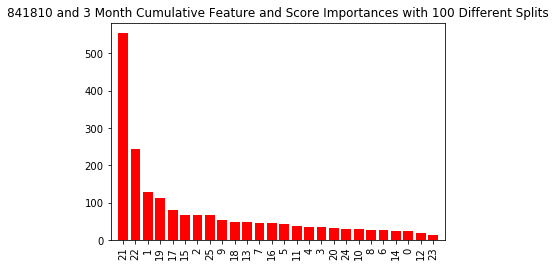

In [18]:
# 3 Version for Train Test Split and Feature selection 
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
# Use both RF Importances and R2 Accuracy with different number of splits

from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
from operator import itemgetter, attrgetter

def getKey(item):
    return item[0]

rf = RandomForestRegressor()


number_of_split=100
number_of_row=29



random_state_options = np.arange(0,number_of_split)
predictions= np.ones((number_of_row, number_of_split))
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))

scores = defaultdict(list)
#feature_indices = 
feature_std = np.ones((n_feature, number_of_split))
feature_score=np.zeros((n_feature))

#R2=defaultdict(list)
R2=np.ones(number_of_split)
j=0

sonuc =[]


for random_state_i in random_state_options:

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    RandomForestRegressor.fit(rf,X_train, Y_train)    

    y_predict[:,j] = rf.predict(X_test)
    
    acc = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
    R2[j] = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
        
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)


    feature_importances[:,j]=importances
    feature_indices[:,j]=indices
    feature_std [:,j]=std

    j=j+1

R2_Adj=1-R2
score_coefficient=n_feature*(R2_Adj - np.max(R2_Adj))/-np.ptp(R2_Adj)

    
print ("Features scores:")    
for i in range(n_feature):
    feature_score[i]=0
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]+1
        importances_coeff=int((feature_importances[i,j]*10000))/10000
        score_coeff=int((score_coefficient[j]+1)*10)/10

        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)

        score=score_coeff*(importances_coeff)
        feature_score[i]=feature_score[i]+score


#    print( feature_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = (np.argsort(feature_score)[::-1])

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[scored_feature_indices[f]], scored_feature_indices[f], importances[scored_feature_indices[f]],std[scored_feature_indices[f]]))


# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and {} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_score[scored_feature_indices],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_indices,rotation=90)
plt.xlim([-1, n_feature])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 12
#plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and {} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()


        

In [19]:
# Calling function by single parameter set 
a=exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,
                   rand=50,is_random_fixed='TRUE',
                   est=200,min_leaf=5,feat=10,max_leaf=10,min_weight=0.0,min_impurity=1e-07)

In [20]:
# By using Ver 3 for Feature Selection results
# Percentile variable takes the most important variables according to its feature score and omits the others.
# ie.25 percentile takes %75 importance variables and omits %25 least important features

percentile=25
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

# Train Test Split after percentile selection

Scaled_Train_Test_Split=exp.X_Y_scaler_train_test_Split(X_threshold,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


In [21]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000,random_state=50)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
exp.inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')

(1892, 2537, 0.645)

In [ ]:
exp.randomforest(X_train, X_test, y_train, y_test,scaler_y,est=3000,rand=50)